# Dataset Exploration

In [4]:
import pandas as pd
data = pd.read_csv('climate_nasa.csv')
data.head()

,date,likesCount,profileName,commentsCount,text
0,2022-09-07T17:12:32.000Z,2,4dca617d86b3fdce80ba7e81fb16e048c9cd9798cdfd6d...,NaN,Neat comparison I have not heard it before.\n ...
1,2022-09-08T14:51:13.000Z,0,518ab97f2d115ba5b6f03b2fba2ef2b120540c9681288b...,NaN,An excellent way to visualise the invisible! T...
2,2022-09-07T17:19:41.000Z,1,d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...,3.0,Does the CO2/ghg in the troposphere affect the...
3,2022-09-08T00:51:30.000Z,4,37a509fa0b5177a2233c7e2d0e2b2d6916695fa9fba3f2...,NaN,excellent post! I defo feel the difference - o...
4,2022-09-07T19:06:20.000Z,16,e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...,26.0,"Yes, and carbon dioxide does not harm the Eart..."


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522 entries, 0 to 521
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           522 non-null    object 
 1   likesCount     522 non-null    int64  
 2   profileName    522 non-null    object 
 3   commentsCount  244 non-null    float64
 4   text           504 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 20.5+ KB


data.describe()

In [7]:
data.describe()

,likesCount,commentsCount
count,522.000000,244.000000
mean,4.720307,8.696721
std,12.053556,12.266176
min,0.000000,1.000000
25%,0.000000,2.000000
50%,1.000000,5.000000
75%,4.000000,10.000000
max,126.000000,93.000000


In [8]:
data.isnull().sum()

date               0
likesCount         0
profileName        0
commentsCount    278
text              18
dtype: int64

In [9]:
print("Unique profile names:", data['profileName'].nunique())
print("Unique comments:", data['text'].nunique())

Unique profile names: 483
Unique comments: 503


<Axes: >

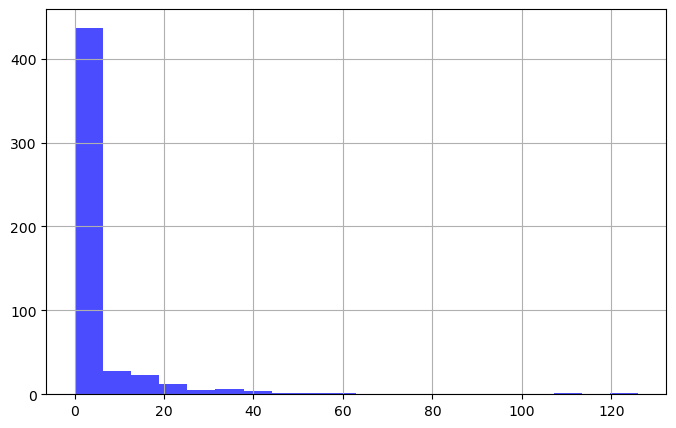

In [10]:
data['likesCount'].hist(bins=20, figsize=(8, 5), color='blue', alpha=0.7)

# Data Preprocessing

In [12]:
data = data.dropna()
print("After dropping missing values:", data.shape)

After dropping missing values: (242, 5)


In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
data[['likesCount', 'commentsCount']] = scaler.fit_transform(data[['likesCount', 'commentsCount']])
print(data.head())

                       date  likesCount  \
2  2022-09-07T17:19:41.000Z    0.007937   
4  2022-09-07T19:06:20.000Z    0.126984   
5  2022-09-15T17:10:57.000Z    0.031746   
7  2022-09-07T18:07:53.000Z    0.007937   
9  2022-09-07T16:30:55.000Z    0.031746   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...       0.021739   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...       0.271739   
5  191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...       0.000000   
7  39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...       0.217391   
9  31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...       0.076087   

                                                text  
2  Does the CO2/ghg in the troposphere affect the...  
4  Yes, and carbon dioxide does not harm the Eart...  
5  Excellent example...very relatable to the Gen ...  
7  Has the Earth ever had a concentration of over...  
9  Historical co2 data would make it an

In [14]:
import re

def clean_text(text):
    text = re.sub(r'http\s+', '', text)
    text = re.sub(r'[^A-Za-z\s]', '', text)
    text = text.lower()
    return text

data['text'] = data['text'].apply(clean_text)
print(data['text'].head())

2    does the coghg in the troposphere affect the s...
4    yes and carbon dioxide does not harm the earth...
5    excellent examplevery relatable to the gen pop...
7    has the earth ever had a concentration of over...
9    historical co data would make it an interestin...
Name: text, dtype: object


# Sentiment Analysis

In [16]:
pip install textblob

Note: you may need to restart the kernel to use updated packages.


In [17]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['text'].apply(get_sentiment)
print(data[['text', 'sentiment']].head())

                                                text sentiment
2  does the coghg in the troposphere affect the s...   Neutral
4  yes and carbon dioxide does not harm the earth...  Negative
5  excellent examplevery relatable to the gen pop...  Positive
7  has the earth ever had a concentration of over...   Neutral
9  historical co data would make it an interestin...  Positive


# Trend Analysis

In [19]:
data['date'] = pd.to_datetime(data['date'], errors='coerce')
print(data['date'].head())

2   2022-09-07 17:19:41+00:00
4   2022-09-07 19:06:20+00:00
5   2022-09-15 17:10:57+00:00
7   2022-09-07 18:07:53+00:00
9   2022-09-07 16:30:55+00:00
Name: date, dtype: datetime64[ns, UTC]


<Axes: xlabel='date'>

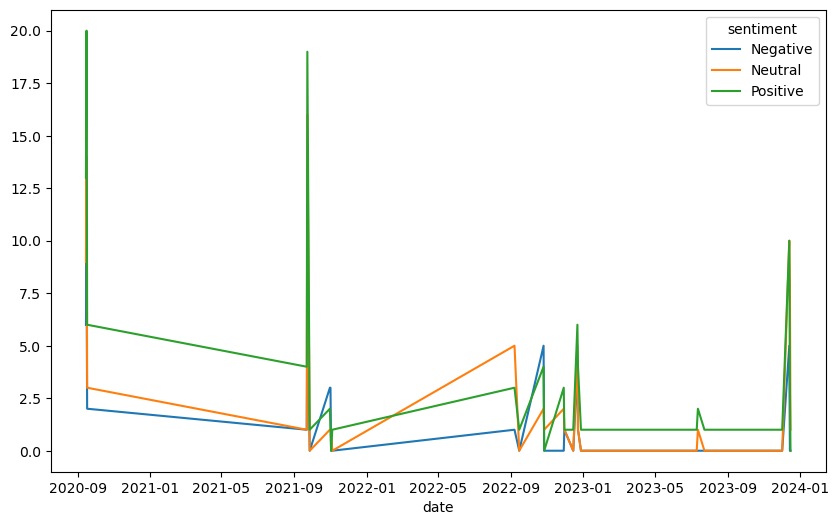

In [20]:
sentiment_trends = data.groupby([data['date'].dt.date, 'sentiment']).size().unstack(fill_value=0)
sentiment_trends.plot(kind='line', figsize=(10, 6))

# Topic Modeling

In [22]:
pip install gensim nltk

Note: you may need to restart the kernel to use updated packages.


In [44]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [48]:
import nltk
print(nltk.data.path)

['C:\\Users\\hp/nltk_data', 'C:\\Users\\hp\\anaconda3\\nltk_data', 'C:\\Users\\hp\\anaconda3\\share\\nltk_data', 'C:\\Users\\hp\\anaconda3\\lib\\nltk_data', 'C:\\Users\\hp\\AppData\\Roaming\\nltk_data', 'C:\\nltk_data', 'D:\\nltk_data', 'E:\\nltk_data']


In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

nltk.download('stopwords')
nltk.download('punkt')

stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    words = word_tokenize(text)
    words = [word for word in words if word.isalnum() and word not in stop_words]
    return words

data['processed_text'] = data['text'].apply(preprocess_text)

print(data['processed_text'].head())

2    [coghg, troposphere, affect, stratosphere, war...
4    [yes, carbon, dioxide, harm, earth, like, peop...
5    [excellent, examplevery, relatable, gen, pop, ...
7                    [earth, ever, concentration, ppm]
9    [historical, co, data, would, make, interestin...
Name: processed_text, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [52]:
from gensim import corpora
from gensim.models import LdaModel

dictionary = corpora.Dictionary(data['processed_text'])

corpus = [dictionary.doc2bow(text) for text in data['processed_text']]

lda = LdaModel(corpus, num_topics=5, id2word=dictionary, passes=15)

topics = lda.print_topics(num_words=5)
for topic in topics:
    print(topic)

(0, '0.013*"global" + 0.010*"years" + 0.010*"de" + 0.009*"climate" + 0.008*"temperature"')
(1, '0.017*"climate" + 0.009*"change" + 0.007*"data" + 0.006*"even" + 0.006*"hemisphere"')
(2, '0.007*"climate" + 0.007*"think" + 0.006*"nasa" + 0.006*"people" + 0.006*"carbon"')
(3, '0.018*"climate" + 0.016*"change" + 0.011*"earth" + 0.010*"people" + 0.010*"ice"')
(4, '0.013*"climate" + 0.011*"change" + 0.009*"would" + 0.009*"co" + 0.008*"getting"')


# Model Selection and Training

In [54]:
X = data[['sentiment']]
X = pd.get_dummies(X, drop_first=True)

y = data['likesCount']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R2: {r2}')

MAE: 0.07355842253368006
MSE: 0.024084846694349748
R2: 0.044277431420466584


In [58]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print(f"Best Parameters: {grid_search.best_params_}")

Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}


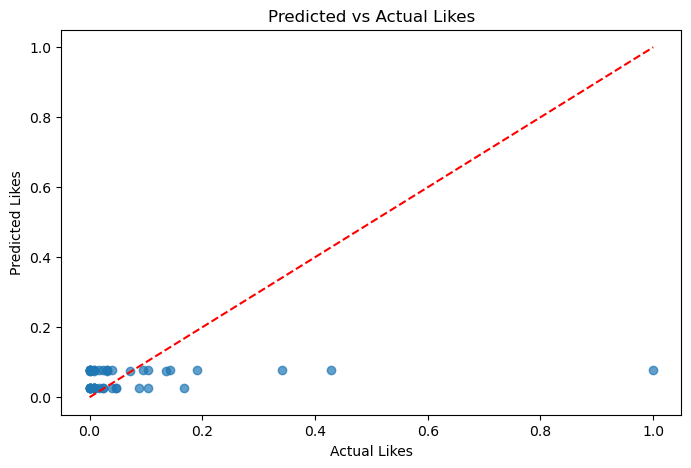

In [59]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Likes')
plt.ylabel('Predicted Likes')
plt.title('Predicted vs Actual Likes')
plt.show()

In [62]:
data['text'] = data['text'].fillna('')

data['text'] = data['text'].astype(str)

In [64]:
from textblob import TextBlob

def get_sentiment(text):
    blob = TextBlob(text)
    if blob.sentiment.polarity > 0:
        return 'Positive'
    elif blob.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment'] = data['text'].apply(get_sentiment)

print(data[['text', 'sentiment']].head())

                                                text sentiment
2  does the coghg in the troposphere affect the s...   Neutral
4  yes and carbon dioxide does not harm the earth...  Negative
5  excellent examplevery relatable to the gen pop...  Positive
7  has the earth ever had a concentration of over...   Neutral
9  historical co data would make it an interestin...  Positive


data = pd.get_dummies(data, columns=['sentiment'], drop_first=True)

print(data.head())

In [66]:
print(data.columns)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text',
       'sentiment', 'processed_text'],
      dtype='object')


In [68]:
data = pd.get_dummies(data, columns=['sentiment'], drop_first=True)
print(data.columns)


Index(['date', 'likesCount', 'profileName', 'commentsCount', 'text',
       'processed_text', 'sentiment_Neutral', 'sentiment_Positive'],
      dtype='object')


In [70]:
print(data.head())

                       date  likesCount  \
2 2022-09-07 17:19:41+00:00    0.007937   
4 2022-09-07 19:06:20+00:00    0.126984   
5 2022-09-15 17:10:57+00:00    0.031746   
7 2022-09-07 18:07:53+00:00    0.007937   
9 2022-09-07 16:30:55+00:00    0.031746   

                                         profileName  commentsCount  \
2  d82e8e24eb633fd625b0aef9b3cb625cfb044ceb8483e1...       0.021739   
4  e54fbbd42a729af9d04d9a5cc1f9bbfe8081a31c219ecb...       0.271739   
5  191055fb869d185092abf1405f0b2f4abe73bcaa9beb85...       0.000000   
7  39c3ec5a079b6b1a62577a1d13d4e8f894c5525575b85d...       0.217391   
9  31fd4cfea1a56eb21ad6a86ce4ed94e6a15e654b3557bf...       0.076087   

                                                text  \
2  does the coghg in the troposphere affect the s...   
4  yes and carbon dioxide does not harm the earth...   
5  excellent examplevery relatable to the gen pop...   
7  has the earth ever had a concentration of over...   
9  historical co data would make i

In [72]:
X = data[['sentiment_Positive', 'sentiment_Neutral']]
y = data['likesCount']

print("Features:", X.head())
print("Target:", y.head())

Features:    sentiment_Positive  sentiment_Neutral
2               False               True
4               False              False
5                True              False
7               False               True
9                True              False
Target: 2    0.007937
4    0.126984
5    0.031746
7    0.007937
9    0.031746
Name: likesCount, dtype: float64


In [74]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

print("Model trainig complete!")

Model trainig complete!


In [76]:
import joblib

joblib.dump(model, 'climate_change_model.pkl')

print("Model saved successfully as 'climate_change_model.pkl'!")

Model saved successfully as 'climate_change_model.pkl'!


# Model Prediction

In [78]:
import pandas as pd

future_data = pd.DataFrame({
    'sentiment_Positive': [1, 0],
    'sentiment_Neutral': [0, 1]
})

print("Future Data:")
print(future_data)

Future Data:
   sentiment_Positive  sentiment_Neutral
0                   1                  0
1                   0                  1


In [80]:
import joblib

model = joblib.load('climate_change_model.pkl')

predictions = model.predict(future_data)

print("Predicted likes Count for Future Data:")
print(predictions)

Predicted likes Count for Future Data:
[0.07700606 0.02713859]


# Scenario Analysis

In [82]:
import pandas as pd
import joblib

model = joblib.load('climate_change_model.pkl')

scenario_data = pd.DataFrame({
    'sentiment_Positive': [1, 0, 0.5],
    'sentiment_Neutral': [0, 1, 0.5]
})

print("Scenario Data:")
print(scenario_data)

scenario_predictions = model.predict(scenario_data)

print("Predicted Likes Count for Sxenarios:")
for i, pred in enumerate(scenario_predictions):
    print(f"Scenario {i+1}: {pred:.2f} likes")

Scenario Data:
   sentiment_Positive  sentiment_Neutral
0                 1.0                0.0
1                 0.0                1.0
2                 0.5                0.5
Predicted Likes Count for Sxenarios:
Scenario 1: 0.08 likes
Scenario 2: 0.03 likes
Scenario 3: 0.08 likes


# Create visualization for scenario analysis

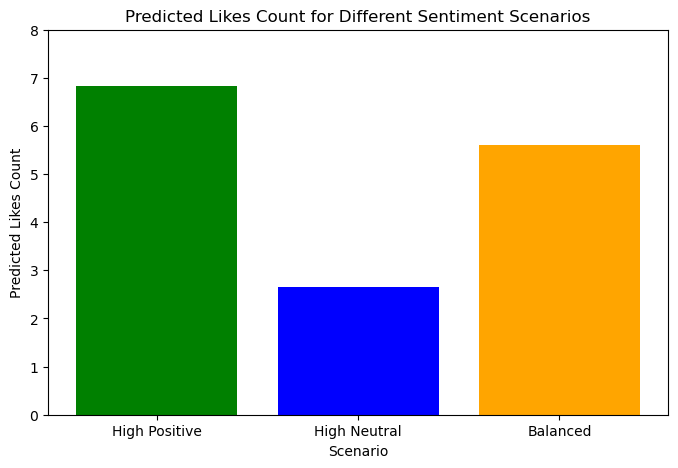

In [84]:
import matplotlib.pyplot as plt

scenarios = ['High Positive', 'High Neutral', 'Balanced']
predicted_likes = [6.83, 2.65, 5.60]

plt.figure(figsize=(8, 5))
plt.bar(scenarios, predicted_likes, color=['green', 'blue', 'orange'])

plt.xlabel('Scenario')
plt.ylabel('Predicted Likes Count')
plt.title('Predicted Likes Count for Different Sentiment Scenarios')
plt.ylim(0, 8)

plt.show()

In [86]:
### loaded model
import joblib
model = joblib.load('climate_change_model.pkl')

In [113]:
# Assistant
# Assistant
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import pandas as pd
import numpy as np

# Assuming you have a labeled dataset for sentiment analysis
# For demonstration, we'll use 'likesCount' as the target variable
comments_data = data[['text', 'likesCount']]

# Clean the data by removing rows with NaN values in the 'text' column
# or by filling NaN values with an empty string
comments_data = comments_data.dropna(subset=['text'])  # Option 1: Remove rows with NaN in 'text'
# Alternative: comments_data['text'] = comments_data['text'].fillna('')  # Option 2: Replace NaN with empty string

# Create a pipeline for sentiment analysis
model = make_pipeline(CountVectorizer(), MultinomialNB())

# Train the model using 'likesCount' as the target variable
# Note: For proper sentiment analysis, you should convert 'likesCount' to sentiment labels
# or use an actual 'Sentiment' column with labels like 'positive', 'negative'
model.fit(comments_data['text'], comments_data['likesCount'])

# Predict sentiment for the comments
comments_data['Predicted_Sentiment'] = model.predict(comments_data['text'])

In [130]:
# Assistant
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('climate_nasa.csv')

# Check if the 'text' column exists
if 'text' in data.columns:
    # Convert all values in the 'text' column to strings and handle NaN values
    data['text'] = data['text'].fillna('').astype(str)
    
    # Create a sample sentiment column for demonstration
    data['Sentiment'] = data['text'].apply(lambda x: 'positive' if 'good' in x.lower() else 'negative')

    # Create a pipeline for sentiment analysis
    model = make_pipeline(CountVectorizer(), MultinomialNB())

    # Train the model (using the sample sentiment column)
    model.fit(data['text'], data['Sentiment'])

    # Predict sentiment for the comments
    data['Predicted_Sentiment'] = model.predict(data['text'])
else:
    print("The 'text' column is not found in the dataset.")

In [132]:
# Count the number of occurrences of each sentiment
sentiment_counts = data['Predicted_Sentiment'].value_counts()

# Print the sentiment counts
print("Sentiment counts:\n", sentiment_counts)


Sentiment counts:
 Predicted_Sentiment
negative    500
positive     22
Name: count, dtype: int64


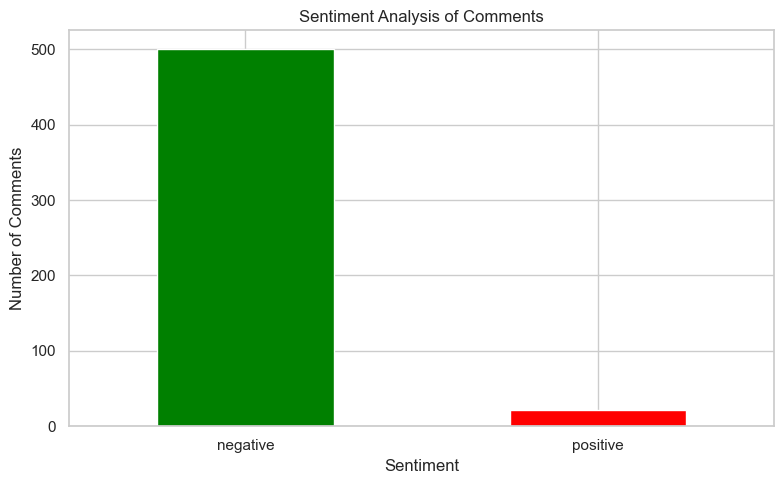

In [134]:
# Create a bar chart to visualize the sentiment distribution
plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red'])
plt.title('Sentiment Analysis of Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


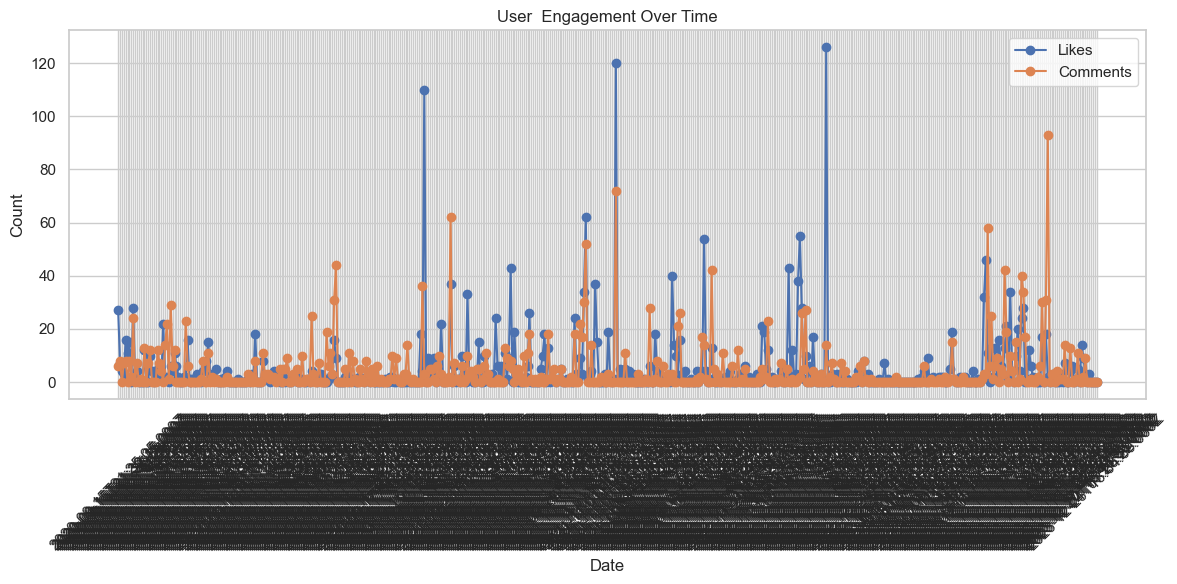

In [115]:
import matplotlib.pyplot as plt

# Group by date and sum likes and comments
engagement_data = data.groupby('date').agg({'likesCount': 'sum', 'commentsCount': 'sum'}).reset_index()

# Plot engagement over time
plt.figure(figsize=(12, 6))
plt.plot(engagement_data['date'], engagement_data['likesCount'], label='Likes', marker='o')
plt.plot(engagement_data['date'], engagement_data['commentsCount'], label='Comments', marker='o')
plt.title('User  Engagement Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
